In [52]:
import thinkdsp
import thinkplot
import matplotlib
import matplotlib.pyplot as plt

from scipy import signal
import numpy as np
thinkdsp.random_seed(42) # We need a random number for noise

## Anwendung der Kreuzkorrelationsfunktionen
Man kann Ereignisse miteinander korrelieren.
So werden Messtechniken eingesetzt, die Signale generieren, die miteinander in Zusammenhang stehen, jedoch zeitlich versetzt und z.B. stark verrauscht sind.
Wir generieren uns zwei Sinuswellen, die zueinander phasenverschoben sind, wo die Phasenverschiebung detektiert werden soll, um z.B. einen Abstand zu bestimmen.
Das wird z.B. bei Sonar- oder Radar-Systemen benutzt. Aber auch optische Korrelatoren benutzen dieses Prinzip.

In [60]:
def make_sine_with_noise(offset): # Generate a sinwave with SNR of 2
    noise_signal = thinkdsp.UncorrelatedGaussianNoise(amp=0.5)
    signal = thinkdsp.SinSignal(amp=1.0, freq=500, offset=offset)
    mix = signal + noise_signal
    wave = mix.make_wave(duration=0.5, framerate=10000)
    wave.normalize()
    return wave

Erzeugung der verrauschten Sinuswelle mit einem Amplitudenverhältnis von SNR=0.5/1.0=2 (Signalamplitude zu Rauschamplitude) bei Nicht-Leistungsisgnal.
Hier ist also das Rauschen doppelt so hoch, wie die nutzbare Amplitude des Signals.

In [61]:
def gen_waves(offset): # Generate two sinwaves with a defined phase offset
    wave1 = make_sine_with_noise(offset=0)
    wave2 = make_sine_with_noise(offset=-offset)
    wave1.normalize()
    wave2.normalize()
    return wave1.segment(duration=0.01), wave2.segment(duration=0.01)

Diese Funktion erzeugt zwei phasenversetzte, verrauschte Sinussignale mit relativ kurzer Dauer, so dass man sie gut darstellen kann.

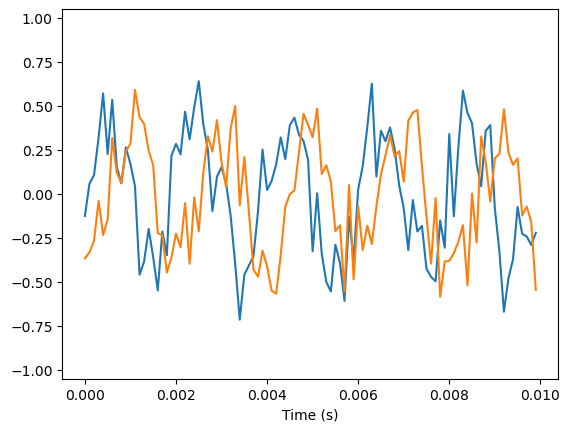

In [62]:
wave1, wave2 = gen_waves(np.pi/2) # Generate two waves with pi/2 offset
wave1.plot()
wave2.plot()
thinkplot.config(xlabel='Time (s)', ylim=[-1.05, 1.05])

Die Periodizität und Ähnlichkeit der beiden Signale ist bei reiner Betrachtung der beiden Signale nicht mehr deutlich zu erkenne.
Auch ist der Phasenversatz nicht mehr zu detektieren.
Eine Kreuzkorrelation der beiden Signale generiert den Phasenversatz, also die Ähnlichkeit der Signale und damit die zeitliche Versetzung.
So kann z.B. bei Radar-Systemen die Laufzeit gemessen werden.

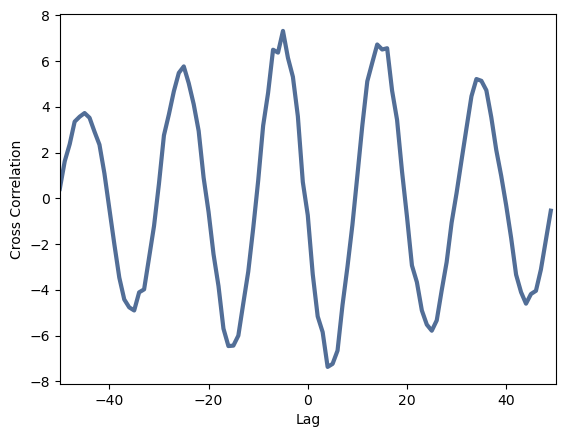

In [63]:
N = len(wave1)
corrs2 = np.correlate(wave1.ys, wave2.ys, mode='same')
lags = np.arange(-N//2, N//2)
thinkplot.plot(lags, corrs2)
thinkplot.config(xlabel='Lag', ylabel='Cross Correlation', xlim=[-N//2, N//2])

In [64]:
corr_length = len(corrs2)
low, high = -20+int(corr_length/2), 20+int(corr_length/2) # Einschränkung des Suchbereichs
lag = np.array(corrs2[low:high]).argmax() + low
laghigh = lag-corr_length/2
print("Highest Peak:",laghigh)

Highest Peak: -5.0


Der höchste Peak aus der Korrelationsfunktion kann aus dem Array coors extrahiert werden.
Er liegt - von der Mitte des Arrays aus gesehen - beim Sample -5.
Damit ergibt sich ein zeitlicher Versatz der beiden Signals von 0.5ms.

In [65]:
periodhigh = laghigh / wave1.framerate
print(periodhigh, "s")

-0.0005 s


In [66]:
periode_theo_100 = 1.0/100.0
print(periode_theo_100/2.0)

0.005


Der theoretische Versatz eines 500Hz Signals bei Pi/2 beträgt ebenfalls 0.5ms.